In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import statsmodels as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [261]:
merged = pd.read_csv('mergedv3.csv') 

In [262]:
merged.head()

,Unnamed: 0,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,...,NUMBER OF MOTORIST KILLED,Neigh_Slow_Zone_Total,Speed_Bump_Total,Shape_Area,Shape_Le_1,Shape_Leng,Total_Pop,geometry,Per_Cap_Injury_Per_Thou,Injuries_Per_Thou
0,0,682013,68.0,2013,0,0,0,0,0,0,...,1,0.0,1.0,3.979240,44529.950978,44530.501555,124528.0,POLYGON ((-74.03231070638779 40.64357458486165...,4.721830,4.721830
1,1,682014,68.0,2014,0,0,4,4,0,8,...,1,0.0,2.0,3.979240,44529.950978,44530.501555,124528.0,POLYGON ((-74.03231070638779 40.64357458486165...,4.938648,4.938648
2,2,682015,68.0,2015,4,0,3,11,2,20,...,3,0.0,3.0,3.979240,44529.950978,44530.501555,124528.0,POLYGON ((-74.03231070638779 40.64357458486165...,4.280162,4.280162
3,3,1022013,102.0,2013,0,0,0,0,0,0,...,1,0.0,2.0,4.781724,52865.281367,52865.281067,144215.0,POLYGON ((-73.81709738766487 40.70402979980382...,5.464064,5.464064
4,4,1022014,102.0,2014,0,4,4,7,1,16,...,3,0.0,8.0,4.781724,52865.281367,52865.281067,144215.0,POLYGON ((-73.81709738766487 40.70402979980382...,5.637416,5.637416


In [301]:
merged.columns

Index([u'Unnamed: 0', u'PrecinctYear', u'Precinct', u'Year', u'Taxis',
       u'Flyers', u'Seniors', u'Outreach', u'HandsOn', u'Edu_Total',
       u'Backing Unsafely', u'Brake Lights (Defect.or Improper)',
       u'Bus Lane, Driving in', u'Cell Phone', u'Commercial Veh on Pkwy',
       u'Defective Brakes', u'Disobey Steady Red Signal',
       u'Disobey Traffic Control Device', u'Equipment (Other)',
       u'Fail to Keep Right', u'Fail to Signal', u'Following Too Closely',
       u'Headlights (Defect. or Improper)', u'Improper Lights',
       u'Improper Passing', u'Improper Turn', u'Improper/Missing Plates',
       u'Not Giving R of W to Pedes.', u'Not Giving R of W to Veh.',
       u'One Way Street', u'Other Movers', u'Pavement Markings',
       u'Safety Belt', u'School Bus, Passing Stopped', u'Speeding',
       u'Spillback', u'Tinted Windows', u'Truck Routes', u'U-Turn',
       u'Uninspected', u'Uninsured', u'Unlicensed Operator', u'Unregistered',
       u'P12', u'P123', u'Traf_Total'

In [263]:
merged.shape

(231, 63)

In [273]:
(merged['Edu_Total'] == 0).sum()

80

In [274]:
(merged['Edu_Total'] != 0).sum()

151

In [275]:
merged['Edu_dummy'] = np.zeros(len(merged.Edu_Total))

In [276]:
for i in merged.index:
    if merged.Edu_Total.ix[i] != 0:
        merged.Edu_dummy.ix[i] = 1

In [303]:
merged.iloc[:, -16]

0      117
1      127
2       98
3      139
4      134
5      134
6      141
7      125
8      124
9      118
10      96
11      94
12      42
13      40
14      28
15     198
16     168
17     158
18      98
19      78
20      67
21      60
22      88
23      67
24     265
25     227
26     199
27     122
28     126
29      93
      ... 
201    140
202    120
203    112
204    144
205    134
206    103
207     53
208     50
209     40
210    165
211    139
212    133
213    108
214    116
215     87
216    171
217    116
218    134
219     65
220     62
221     55
222     72
223     72
224     90
225    203
226    167
227    170
228    122
229     92
230    109
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

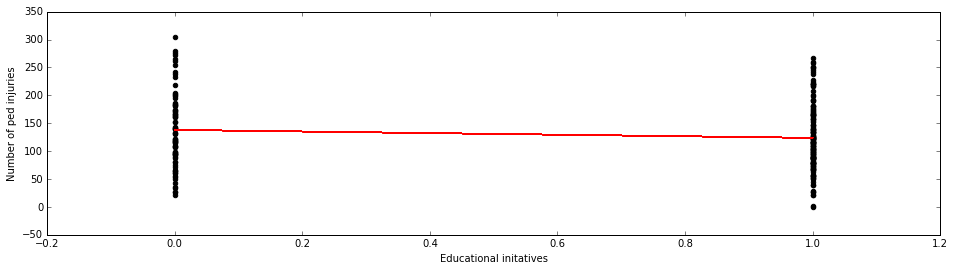

In [304]:
lm = smf.ols(formula = 'merged.iloc[:, -16] ~ merged.Edu_dummy', data = merged).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(merged['Edu_dummy'], merged['NUMBER OF PEDESTRIANS INJURED'], c = 'k')
ax1.plot(merged['Edu_dummy'], lm.predict(), c = 'r')
ax1.set_xlabel('Educational initatives')
ax1.set_ylabel('Number of ped injuries')
pl.show()
# ax1.set_title('')

In [305]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     merged.iloc[:, -16]   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     2.791
Date:                 Wed, 07 Dec 2016   Prob (F-statistic):             0.0962
Time:                         17:56:58   Log-Likelihood:                -1279.5
No. Observations:                  231   AIC:                             2563.
Df Residuals:                      229   BIC:                             2570.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          137.9750      6.914     19.956      0.000       124.352   151.598
merged.Edu_dummy   -14.2863      8.551     -1.671      0.096       -31.136     2.563
==============================================================================
Omnibus:                        8.433   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.710
Skew:                           0.453   Prob(JB):                       0.0128
Kurtosis:                       2.711   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
#eduData = merged[(merged.Year == 2013) | (merged.Year == 2015)]
#eduData.head() 

In [266]:
#eduData.columns

In [267]:
#eduData.drop([u'Unnamed: 0',
       u'Backing Unsafely', u'Brake Lights (Defect.or Improper)',
       u'Bus Lane, Driving in', u'Cell Phone', u'Commercial Veh on Pkwy',
       u'Defective Brakes', u'Disobey Steady Red Signal',
       u'Disobey Traffic Control Device', u'Equipment (Other)',
       u'Fail to Keep Right', u'Fail to Signal', u'Following Too Closely',
       u'Headlights (Defect. or Improper)', u'Improper Lights',
       u'Improper Passing', u'Improper Turn', u'Improper/Missing Plates',
       u'Not Giving R of W to Pedes.', u'Not Giving R of W to Veh.',
       u'One Way Street', u'Other Movers', u'Pavement Markings',
       u'Safety Belt', u'School Bus, Passing Stopped', u'Speeding',
       u'Spillback', u'Tinted Windows', u'Truck Routes', u'U-Turn',
       u'Uninspected', u'Uninsured', u'Unlicensed Operator', u'Unregistered',
       u'P12', u'P123', u'Traf_Total', u'Neigh_Slow_Zone_Total',
       u'Speed_Bump_Total', u'Shape_Area', u'Shape_Le_1', u'Shape_Leng', u'geometry', u'Per_Cap_Injury_Per_Thou'],
            axis = 1, inplace = True)

IndentationError: unexpected indent (<ipython-input-267-f0f0825881c1>, line 2)

In [269]:
#eduData.head()

In [270]:
#eduData.shape

In [271]:
#(eduData['Edu_Total'] == 0).sum()

In [272]:
#eduData['Edu_dummy'] = np.zeros(len(eduData.Edu_Total))

In [214]:
eduData.reset_index(drop = True, inplace = True)

In [215]:
eduData.shape

(154, 20)

In [216]:
(eduData.Edu_Total == 0).sum()

80

In [217]:
(eduData.Edu_Total != 0).sum()

74

In [218]:
eduData.Edu_Total.ix[4] != 0

False

In [219]:
for i in eduData.index:
    if eduData.Edu_Total.ix[i] != 0:
        eduData.Edu_dummy.ix[i] = 1

/Users/Anastasia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [220]:
eduData.head()

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Total_Pop,Injuries_Per_Thou,Edu_dummy
0,682013,68.0,2013,0,0,0,0,0,0,588,4,117,3,37,0,434,1,124528.0,4.721830,0.0
1,682015,68.0,2015,4,0,3,11,2,20,533,3,98,0,34,0,401,3,124528.0,4.280162,1.0
2,1022013,102.0,2013,0,0,0,0,0,0,788,6,139,5,63,0,586,1,144215.0,5.464064,0.0
3,1022015,102.0,2015,8,0,2,4,0,14,870,3,134,2,50,0,686,1,144215.0,6.032660,1.0
4,252013,25.0,2013,0,0,0,0,0,0,492,4,141,3,21,1,330,0,47405.0,10.378652,0.0


In [221]:
(eduData.Edu_dummy == 1).sum()

74

In [222]:
(eduData.Edu_dummy == 0).sum()

80

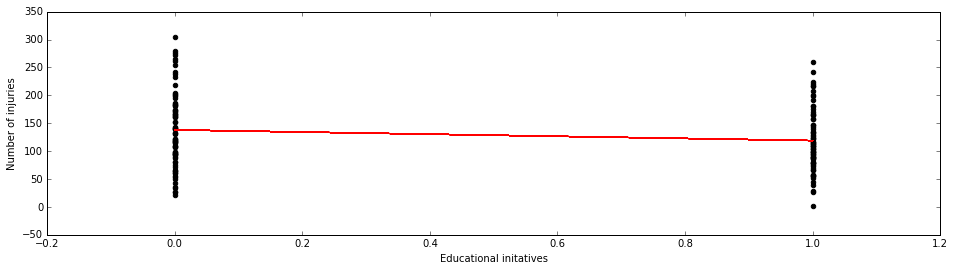

In [230]:
ed_lm0 = smf.ols(formula = 'eduData.iloc[:, 11] ~ eduData.Edu_dummy', data = eduData).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(eduData['Edu_dummy'], eduData['NUMBER OF PEDESTRIANS INJURED'], c = 'k')
ax1.plot(eduData['Edu_dummy'], ed_lm0.predict(), c = 'r')
ax1.set_xlabel('Educational initatives')
ax1.set_ylabel('Number of injuries')
pl.show()
# ax1.set_title('')

In [231]:
ed_lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     eduData.iloc[:, 11]   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     3.682
Date:                 Wed, 07 Dec 2016   Prob (F-statistic):             0.0569
Time:                         16:10:13   Log-Likelihood:                -852.57
No. Observations:                  154   AIC:                             1709.
Df Residuals:                      152   BIC:                             1715.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           137.9750      6.908     19.972      0.000       124.326   151.624
eduData.Edu_dummy   -19.1236      9.966     -1.919      0.057       -38.813     0.566
==============================================================================
Omnibus:                        5.431   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.551
Skew:                           0.443   Prob(JB):                       0.0623
Kurtosis:                       2.720   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
edOnly = eduData[eduData['Edu_dummy'] == 1]

In [252]:
edOnly.shape

(74, 22)

In [253]:
edOnly.head()

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Total_Pop,Injuries_Per_Thou,Edu_dummy,HandsOn_dummy,ped_inj_pc
1,682015,68.0,2015,4,0,3,11,2,20,533,...,0,34,0,401,3,124528.0,4.280162,1.0,1.0,0.786972
3,1022015,102.0,2015,8,0,2,4,0,14,870,...,2,50,0,686,1,144215.0,6.032660,1.0,0.0,0.929168
5,252015,25.0,2015,2,0,0,6,0,8,444,...,0,30,1,290,1,47405.0,9.366101,1.0,0.0,0.859827
7,422015,42.0,2015,2,0,1,16,0,19,363,...,0,26,0,243,0,79762.0,4.551039,1.0,0.0,1.982913
9,762015,76.0,2015,3,0,0,4,0,7,301,...,1,26,1,247,0,43694.0,6.888818,1.0,0.0,0.351044


In [257]:
edOnly.iloc[:, 11].values

array([ 98, 134, 124,  94,  28, 158,  67,  67, 199,  93,  55,  45,  58,
        89, 216, 241,  79,  98, 220, 116,  26,  73,  75, 116, 122, 223,
       104, 109, 113, 181, 105, 207,  52, 165,  78, 139, 144, 100, 129,
        89, 181,  78, 176,  69, 157,  95,  57,  80, 192, 146, 114, 217,
       259, 123,   2,  88, 146, 167,  85, 110, 127, 170, 165,  98, 201,
       112, 103,  40, 133,  87, 134,  55,  90, 109])

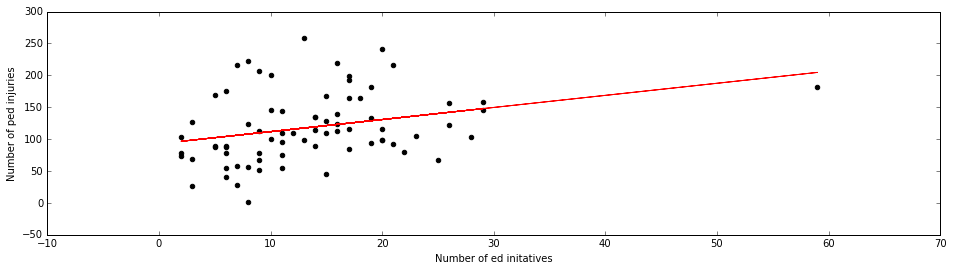

In [258]:
edOnly_lm = smf.ols(formula = 'edOnly.iloc[:, 11] ~ edOnly.Edu_Total', data = edOnly).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(edOnly.Edu_Total, edOnly['NUMBER OF PEDESTRIANS INJURED'], c = 'k')
ax1.plot(edOnly['Edu_Total'], edOnly_lm.predict(), c = 'r')
ax1.set_xlabel('Number of ed initatives')
ax1.set_ylabel('Number of ped injuries')
pl.show()
# ax1.set_title('')

In [259]:
edOnly_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     edOnly.iloc[:, 11]   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.235
Date:                Wed, 07 Dec 2016   Prob (F-statistic):            0.00888
Time:                        17:34:19   Log-Likelihood:                -397.11
No. Observations:                  74   AIC:                             798.2
Df Residuals:                      72   BIC:                             802.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           92.8284     11.440      8.114      0.000        70.023   115.634
edOnly.Edu_Total     1.8954      0.705      2.690      0.009         0.491     3.300
==============================================================================
Omnibus:                        6.412   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.212
Skew:                           0.709   Prob(JB):                       0.0448
Kurtosis:                       3.048   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
(eduData['HandsOn'] == 0).sum()

114

In [236]:
(eduData['HandsOn'] != 0).sum()

40

In [234]:
# Adding a dummy variable for hands on initiatives
eduData['HandsOn_dummy'] = np.zeros(len(eduData.HandsOn))

/Users/Anastasia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [237]:
for i in eduData.index:
    if eduData.HandsOn.ix[i] != 0:
        eduData.HandsOn_dummy.ix[i] = 1

/Users/Anastasia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


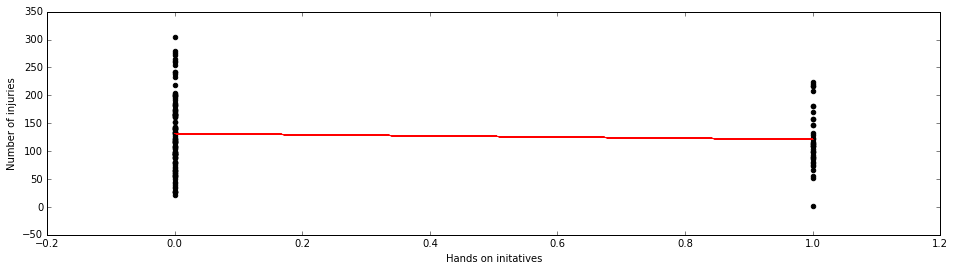

In [240]:
ho_lm0 = smf.ols(formula = 'eduData.iloc[:, 11] ~ eduData.HandsOn_dummy', data = eduData).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(eduData['HandsOn_dummy'], eduData['NUMBER OF PEDESTRIANS INJURED'], c = 'k')
ax1.plot(eduData['HandsOn_dummy'], ho_lm0.predict(), c = 'r')
ax1.set_xlabel('Hands on initatives')
ax1.set_ylabel('Number of injuries')
pl.show()
# ax1.set_title('')

In [241]:
ho_lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     eduData.iloc[:, 11]   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.8586
Date:                 Wed, 07 Dec 2016   Prob (F-statistic):              0.356
Time:                         16:52:13   Log-Likelihood:                -853.98
No. Observations:                  154   AIC:                             1712.
Df Residuals:                      152   BIC:                             1718.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               131.5439      5.840     22.523      0.000       120.005   143.083
eduData.HandsOn_dummy   -10.6189     11.460     -0.927      0.356       -33.260    12.022
==============================================================================
Omnibus:                        6.124   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.321
Skew:                           0.481   Prob(JB):                       0.0424
Kurtosis:                       2.754   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

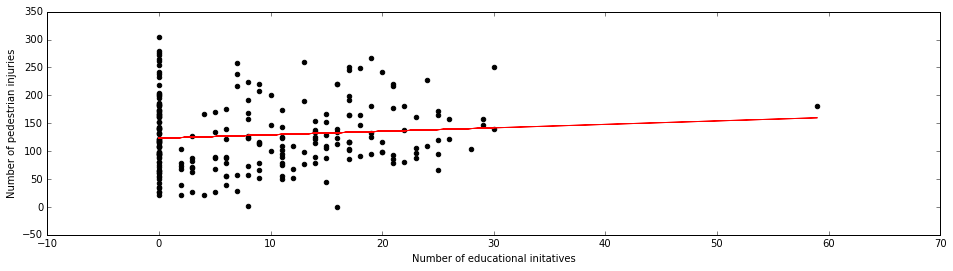

In [87]:
ed_lm1 = smf.ols(formula = 'ed_data.iloc[:, 7] ~ ed_data.Edu_Total', data = ed_data).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(ed_data['Edu_Total'], ed_data['NUMBER OF PEDESTRIANS INJURED'], c = 'k')
ax1.plot(ed_data['Edu_Total'], ed_lm1.predict(), c = 'r')
ax1.set_xlabel('Number of educational initatives')
ax1.set_ylabel('Number of pedestrian injuries')
pl.show()
# ax1.set_title('')

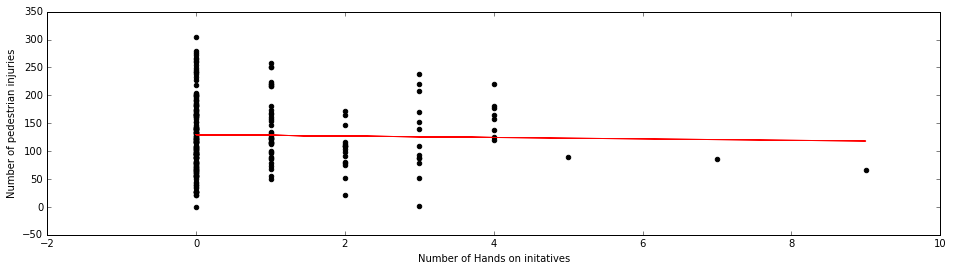

In [89]:
ed_lm2 = smf.ols(formula = 'ed_data.iloc[:, 7] ~ ed_data.HandsOn', data = ed_data).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(ed_data['HandsOn'], ed_data['NUMBER OF PEDESTRIANS INJURED'], c = 'k')
ax1.plot(ed_data['HandsOn'], ed_lm2.predict(), c = 'r')
ax1.set_xlabel('Number of Hands on initatives')
ax1.set_ylabel('Number of pedestrian injuries')
pl.show()
# ax1.set_title('')

In [90]:
ed_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ed_data.iloc[:, 7]   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1630
Date:                Wed, 07 Dec 2016   Prob (F-statistic):              0.687
Time:                        02:00:45   Log-Likelihood:                -1280.9
No. Observations:                 231   AIC:                             2566.
Df Residuals:                     229   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         129.5420      4.666     27.761      0.000       120.347   138.736
ed_data.HandsOn    -1.2756      3.159     -0.404      0.687        -7.500     4.949
==============================================================================
Omnibus:                        9.161   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.593
Skew:                           0.482   Prob(JB):                      0.00826
Kurtosis:                       2.739   Cond. No.                         1.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
eduData['ped_inj_pc'] = eduData['NUMBER OF PEDESTRIANS INJURED'] / (ed_data.Total_Pop / 1000)
#eduData['ed_pc'] = ed_data['Edu_Total'] / (ed_data.Total_Pop / 1000)
#eduData['hands_pc'] = ed_data['HandsOn'] / (ed_data.Total_Pop / 1000)

/Users/Anastasia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [243]:
eduData.head()

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Total_Pop,Injuries_Per_Thou,Edu_dummy,HandsOn_dummy,ped_inj_pc
0,682013,68.0,2013,0,0,0,0,0,0,588,...,3,37,0,434,1,124528.0,4.721830,0.0,0.0,0.939548
1,682015,68.0,2015,4,0,3,11,2,20,533,...,0,34,0,401,3,124528.0,4.280162,1.0,1.0,0.786972
2,1022013,102.0,2013,0,0,0,0,0,0,788,...,5,63,0,586,1,144215.0,5.464064,0.0,0.0,1.116215
3,1022015,102.0,2015,8,0,2,4,0,14,870,...,2,50,0,686,1,144215.0,6.032660,1.0,0.0,0.929168
4,252013,25.0,2013,0,0,0,0,0,0,492,...,3,21,1,330,0,47405.0,10.378652,0.0,0.0,0.977707


In [244]:
(eduData['Total_Pop'] == 0).sum()

2

In [245]:
ed_pc_data = eduData[eduData['Total_Pop'] != 0] #removing precints with zero population
ed_pc_data = eduData[eduData['ped_inj_pc'] < 
                          (ed_pc_data['ped_inj_pc']).std() * 3 + (ed_pc_data['ped_inj_pc']).mean()]

In [248]:
ed_pc_data.describe()

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Total_Pop,Injuries_Per_Thou,Edu_dummy,HandsOn_dummy,ped_inj_pc
count,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,6.314180e+05,62.940397,2014.006623,1.450331,0.019868,0.662252,3.642384,0.562914,6.337748,583.172185,...,1.655629,48.768212,0.139073,406.238411,1.046358,105047.192053,inf,0.483444,0.258278,1.530562
std,3.570756e+05,35.707559,1.003306,2.632334,0.140009,1.380277,5.343338,1.288804,8.147709,311.258516,...,1.697238,32.812080,0.383662,268.445121,1.425191,51037.583279,NaN,0.501389,0.439144,1.195508
min,1.201300e+04,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000,...,0.000000,1.000000,0.000000,40.000000,0.000000,0.000000,1.981965,0.000000,0.000000,0.015849
25%,3.220140e+05,32.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.000000,...,0.000000,24.500000,0.000000,210.500000,0.000000,62474.000000,4.044737,0.000000,0.000000,0.716695
50%,6.620130e+05,66.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,561.000000,...,1.000000,38.000000,0.000000,369.000000,1.000000,101720.000000,5.488435,0.000000,0.000000,1.170993
75%,9.720140e+05,97.000000,2015.000000,2.000000,0.000000,1.000000,6.000000,1.000000,11.500000,717.500000,...,2.000000,72.000000,0.000000,514.000000,1.000000,141761.000000,7.163138,1.000000,1.000000,1.981903
max,1.232015e+06,123.000000,2015.000000,19.000000,1.000000,7.000000,25.000000,9.000000,29.000000,1820.000000,...,8.000000,168.000000,2.000000,1628.000000,6.000000,247354.000000,inf,1.000000,1.000000,6.973028


In [247]:
ed_pc_data.shape

(151, 22)

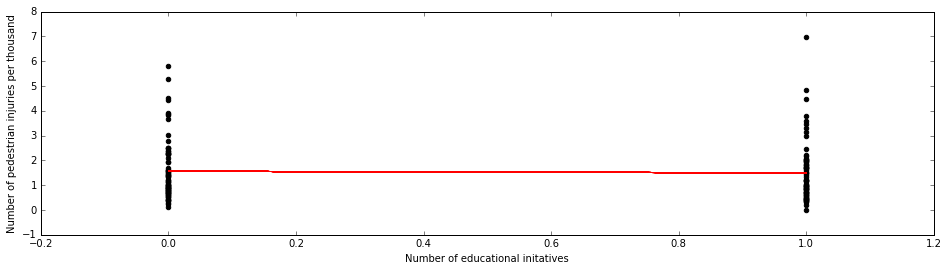

In [249]:
ed_pc_lm = smf.ols(formula = 'ped_inj_pc ~ Edu_dummy', data = ed_pc_data).fit()
fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(ed_pc_data['Edu_dummy'], ed_pc_data['ped_inj_pc'], c = 'k')
ax1.plot(ed_pc_data['Edu_dummy'], ed_pc_lm.predict(), c = 'r')
ax1.set_xlabel('Number of educational initatives')
ax1.set_ylabel('Number of pedestrian injuries per thousand')
pl.show()
# ax1.set_title('')

In [250]:
ed_pc_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ped_inj_pc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1189
Date:                Wed, 07 Dec 2016   Prob (F-statistic):              0.731
Time:                        17:13:02   Log-Likelihood:                -240.66
No. Observations:                 151   AIC:                             485.3
Df Residuals:                     149   BIC:                             491.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5631      0.136     11.513      0.000         1.295     1.831
Edu_dummy     -0.0673      0.195     -0.345      0.731        -0.453     0.319
==============================================================================
Omnibus:                       63.069   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.946
Skew:                           1.762   Prob(JB):                     6.82e-36
Kurtosis:                       6.650   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

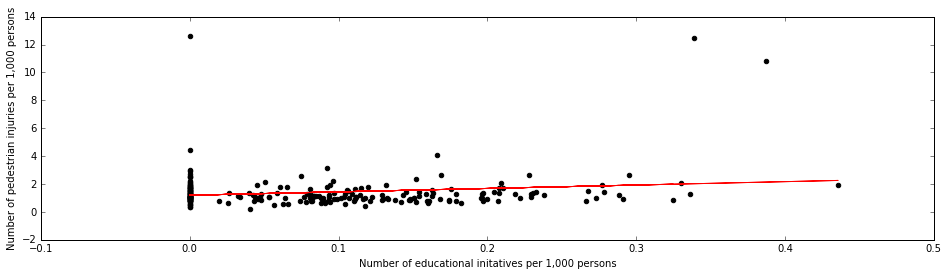

In [58]:
ed_lm = smf.ols(formula = 'ped_inj_pc ~ ed_pc', data = ed_all_data).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(ed_all_data['ed_pc'], ed_all_data['ped_inj_pc'], c = 'k')
ax1.plot(ed_all_data['ed_pc'], ed_lm.predict(), c = 'r')
ax1.set_xlabel('Number of educational initatives per 1,000 persons')
ax1.set_ylabel('Number of pedestrian injuries per 1,000 persons')
pl.show()
# ax1.set_title('')

In [59]:
ed_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ped_inj_pc   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.090
Date:                Wed, 07 Dec 2016   Prob (F-statistic):             0.0143
Time:                        01:37:12   Log-Likelihood:                -386.28
No. Observations:                 225   AIC:                             776.6
Df Residuals:                     223   BIC:                             783.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1946      0.127      9.400      0.000         0.944     1.445
ed_pc          2.4353      0.987      2.468      0.014         0.491     4.380
==============================================================================
Omnibus:                      303.422   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19788.029
Skew:                           6.097   Prob(JB):                         0.00
Kurtosis:                      47.295   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

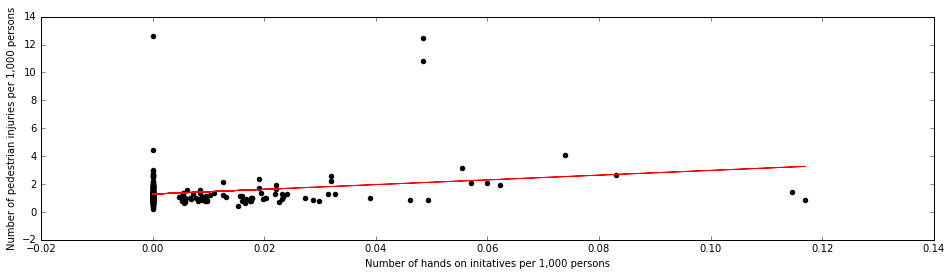

In [63]:
hands_lm = smf.ols(formula = 'ped_inj_pc ~ hands_pc', data = ed_all_data).fit()

fig2, (ax2) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax2.scatter(ed_all_data['hands_pc'], ed_all_data['ped_inj_pc'], c = 'k')
ax2.plot(ed_all_data['hands_pc'], hands_lm.predict(), c = 'r')
ax2.set_xlabel('Number of hands on initatives per 1,000 persons')
ax2.set_ylabel('Number of pedestrian injuries per 1,000 persons')
pl.show()
# ax1.set_title('')

In [64]:
hands_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ped_inj_pc   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.83
Date:                Wed, 07 Dec 2016   Prob (F-statistic):            0.00116
Time:                        01:40:26   Log-Likelihood:                -383.98
No. Observations:                 225   AIC:                             772.0
Df Residuals:                     223   BIC:                             778.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2786      0.098     12.981      0.000         1.085     1.473
hands_pc      16.9607      5.154      3.291      0.001         6.805    27.117
==============================================================================
Omnibus:                      304.621   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20543.700
Skew:                           6.123   Prob(JB):                         0.00
Kurtosis:                      48.182   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""